In [1]:
import pandas as pd
import numpy as np

# Taking care of missing data

In [2]:
df = pd.read_csv('insurance.csv')


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data cleaning

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ['sex', 'smoker', 'region']

for col in columns:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)

df.head()

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Train Model

In [5]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
print(X_train)

      age  sex     bmi  children  smoker  region
216    53    0  26.600         0       0       1
731    53    1  21.400         1       0       3
866    18    1  37.290         0       0       2
202    60    0  24.035         0       0       1
820    45    1  33.700         1       0       3
...   ...  ...     ...       ...     ...     ...
715    60    1  28.900         0       0       3
905    26    0  29.355         2       0       0
1096   51    0  34.960         2       1       0
235    40    0  22.220         2       1       2
1061   57    1  27.940         1       0       2

[1070 rows x 6 columns]


In [8]:
print(y_test)

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64


# Model training

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
svm = SVR()
svm.fit(X_train, y_train)

re = RandomForestRegressor()
re.fit(X_train, y_train)

le = LinearRegression()
le.fit(X_train, y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

# Prediction the data

In [11]:
y_pred1 = re.predict(X_test) 
y_pred2 = svm.predict(X_test)
y_pred3 = le.predict(X_test)
y_pred4 = gb.predict(X_test)

In [12]:
df1 = pd.DataFrame({'Actual':y_test,
                    're':y_pred1,
                    'svm':y_pred2,
                    'le':y_pred3,
                    'gb':y_pred4})

In [13]:
df1

,Actual,re,svm,le,gb
559,1646.42970,1841.401511,9095.891999,4312.086570,3208.410486
1087,11353.22760,12877.286581,9311.611711,12859.497376,12350.820596
1020,8798.59300,8983.424952,9278.239641,12370.503589,10336.948013
460,10381.47870,10826.883939,9265.315942,13549.551148,11342.103899
802,2103.08000,2322.363893,9098.756076,410.554902,2572.269331
...,...,...,...,...,...
682,40103.89000,42059.889944,9196.071206,33330.127561,40215.496902
629,42983.45850,47090.931078,9232.708326,35851.350344,43630.282716
893,44202.65360,45165.368537,9252.890467,36871.781092,43979.883163
807,2136.88225,2256.881206,9097.043275,4885.664416,4043.524176


# Viz

In [14]:
import matplotlib.pyplot as plt

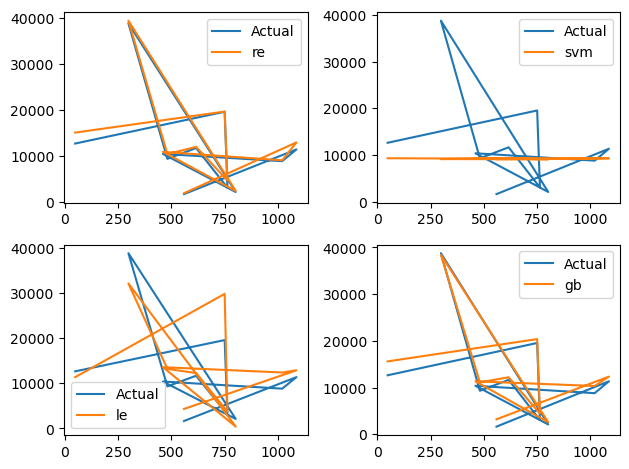

In [15]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['re'].iloc[0:11], label = 're')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['svm'].iloc[0:11], label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['le'].iloc[0:11], label = 'le')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label = 'Actual')
plt.plot(df1['gb'].iloc[0:11], label = 'gb')

plt.tight_layout()

plt.legend()

## Evaluating the algorithms

In [16]:
from sklearn import metrics

In [17]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4= metrics.r2_score(y_test, y_pred4)

In [18]:
print(score1, score2, score3, score4)

0.8577161239702387 -0.1157494429800272 0.762322402256339 0.8756597469022013


## Predict Charges For New Costumers

In [19]:
data = {'age':40,
        'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2}
df = pd.DataFrame(data, index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [20]:
new_pred = gb.predict(df)
print(new_pred)

[41211.37501275]


## Save model using Joblib

In [21]:
gb = GradientBoostingRegressor()
gb.fit(X, y)

GradientBoostingRegressor()

In [22]:
import joblib

In [23]:
joblib.dump(gb, 'model_joblib_gb')

['model_joblib_gb']

In [24]:
model = joblib.load('model_joblib_gb')

In [25]:
model.predict(df)

array([42148.361888])

# GUI

In [26]:
from tkinter import *

In [27]:
import joblib

In [28]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_gb')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])

    Label(master, text = 'Insurance Cost').grid(row = 7)
    Label(master, text = result).grid(row = 8)




master = Tk()
master.title('Insurance Cost Prediction')
label = Label(master,text = 'Insurance Cost Prediction', bg = 'black',
              fg = 'white').grid(row = 0, columnspan=2)

Label(master, text = 'Enter Your Age').grid(row = 1)
Label(master, text = 'Male or Female [1/0]').grid(row = 2)
Label(master, text = 'Enter Your BMI Value').grid(row = 3)
Label(master, text = 'Enter number of your Children').grid(row = 4)
Label(master, text = 'Smoker Yes/No [1/0]').grid(row = 5)
Label(master, text = 'Region [1-4]').grid(row = 6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master,text = 'Predict', command = show_entry).grid()


mainloop()